In [91]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import RepeatedKFold
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.linear_model import Lasso
import seaborn as sns
warnings.filterwarnings('ignore')
from sklearn.linear_model import ElasticNet
from sklearn.decomposition import PCA
import glob
from sklearn import linear_model

In [40]:
#Load company.csv and call it df_features.
df_features = pd.read_csv('company.csv')
df_features.head(5)

,permno,date,mvel1,beta,betasq,chmom,dolvol,idiovol,indmom,mom1m,...,stdacc,stdcf,ms,baspread,ill,maxret,retvol,std_dolvol,std_turn,zerotrade
0,10080,2000-01-31,2868.0,-0.073811,0.020791,-0.097727,3.065142,0.068324,-0.097056,-0.020408,...,NaN,NaN,NaN,0.051729,0.000017,0.136364,0.042418,1.382123,2.053254,1.336364e+01
1,10080,2000-02-29,4541.0,-0.081841,0.017610,0.483402,6.348264,0.068271,0.002209,0.583333,...,NaN,NaN,NaN,0.181881,0.000014,0.444444,0.127924,1.801642,24.497492,8.400000e+00
2,10080,2000-03-31,3107.0,0.104741,0.010971,-0.018970,8.959376,0.076380,0.147039,-0.315789,...,NaN,NaN,NaN,0.106763,0.000024,0.217391,0.095731,1.007548,2.234800,3.150000e+00
3,10080,2000-04-28,2868.0,0.012597,0.000159,-0.108316,7.116191,0.080496,0.310041,-0.076923,...,NaN,NaN,NaN,0.193484,0.000025,0.600000,0.170228,1.714707,24.415433,9.130435e-01
4,10080,2000-05-31,3226.5,0.162976,0.026561,0.140756,8.779481,0.137188,0.249398,0.125000,...,0.073539,0.075737,2.0,0.116561,0.000019,0.230769,0.109373,1.121564,7.291179,2.926231e-08


In [41]:
#Load returns.csv and call it df_returns
df_returns = pd.read_csv('returns.csv')
df_returns.head()

,permno,date,RET
0,10080,2000-01-31,0.583333
1,10080,2000-02-29,-0.315789
2,10080,2000-03-31,-0.076923
3,10080,2000-04-28,0.125000
4,10080,2000-05-31,-0.018519


In [42]:
#Sets invaled values to NaN and transform the columns string to numeric 
df_returns['RET'] = pd.to_numeric(df_returns['RET'], errors='coerce')

In [43]:
#For df_returns, converts Dtype of date column to datetime64
df_returns['date'] = pd.to_datetime(df_returns['date'])
df_returns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60407 entries, 0 to 60406
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   permno  60407 non-null  int64         
 1   date    60407 non-null  datetime64[ns]
 2   RET     58667 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 1.4 MB


In [44]:
#For df_features, converts Dtype of date column to datetime64
df_features['date'] = pd.to_datetime(df_features['date'])
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86702 entries, 0 to 86701
Data columns (total 95 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   permno           86702 non-null  int64         
 1   date             86702 non-null  datetime64[ns]
 2   mvel1            86682 non-null  float64       
 3   beta             80440 non-null  float64       
 4   betasq           80440 non-null  float64       
 5   chmom            81438 non-null  float64       
 6   dolvol           86039 non-null  float64       
 7   idiovol          80440 non-null  float64       
 8   indmom           86700 non-null  float64       
 9   mom1m            86231 non-null  float64       
 10  mom6m            84319 non-null  float64       
 11  mom12m           81438 non-null  float64       
 12  mom36m           70996 non-null  float64       
 13  pricedelay       80440 non-null  float64       
 14  turn             85759 non-null  float

# Solution to Question 1

#### a) First focus on df_returns. Give a graphical overview of how many company returns are available (=not missing) over time. Which companies do you decide for? Does your choice induce any biases?**

In [45]:
df_returns.head()

,permno,date,RET
0,10080,2000-01-31,0.583333
1,10080,2000-02-29,-0.315789
2,10080,2000-03-31,-0.076923
3,10080,2000-04-28,0.125000
4,10080,2000-05-31,-0.018519


In [46]:
#Creating a seperate column for both year and month
df_returns["year"] = df_returns["date"].dt.year
df_returns["month"] = df_returns["date"].dt.month
df_returns.head()

,permno,date,RET,year,month
0,10080,2000-01-31,0.583333,2000,1
1,10080,2000-02-29,-0.315789,2000,2
2,10080,2000-03-31,-0.076923,2000,3
3,10080,2000-04-28,0.125000,2000,4
4,10080,2000-05-31,-0.018519,2000,5


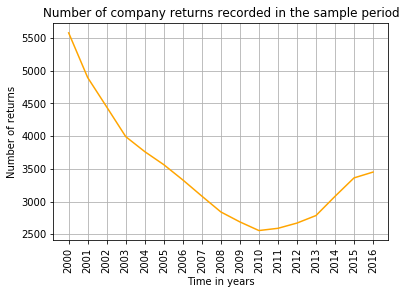

In [47]:
year = [y for y, df in df_returns.groupby("year")]
plt.plot(year, df_returns.groupby("year").count()['RET'], color='orange')
plt.xticks(year, rotation='vertical')
plt.ylabel("Number of returns")
plt.xlabel("Time in years")
plt.title("Number of company returns recorded in the sample period")
plt.grid()
#plt.savefig("Number of company returns over times.jpg", bbox_inches="tight", pad_inches=1, transparent=True)
plt.show()

In [48]:
#these 586 company has observation that are at least active for 12 months
active_atleast_12_mnth = df_returns.groupby("permno").count()[df_returns.groupby("permno").count()>=12].dropna()['RET']
#active_atleast_12_mnth
#excluded company
excluded_cmp = df_returns.groupby("permno").count()[df_returns.groupby("permno").count()<12].dropna()['RET']
#checking how many company excluded from df_returns
len(excluded_cmp)

85

In [49]:
#list of excluded company to use later on
excluded_cmp = excluded_cmp.index

In [50]:
excluded_cmp

Int64Index([10087, 10412, 10545, 11340, 11853, 12544, 13551, 14598, 15955,
            15969, 15972, 16019, 16055, 16059, 16074, 16081, 16099, 16149,
            16158, 16163, 16186, 16187, 16189, 16287, 16294, 16295, 16485,
            20547, 21821, 34404, 35940, 42607, 49083, 56557, 59767, 63088,
            64063, 64646, 65032, 66122, 69809, 72072, 76916, 77025, 77065,
            77276, 77323, 77791, 78620, 79161, 79521, 79868, 80685, 80965,
            81082, 81746, 82224, 82269, 82308, 82804, 83207, 83246, 83274,
            83395, 83430, 83479, 83786, 83833, 83968, 84324, 84418, 84427,
            84627, 85044, 85227, 85574, 85719, 85743, 85779, 85881, 85893,
            86045, 86068, 86317, 86459],
           dtype='int64', name='permno')

In [51]:
#Check it. Active at least 12 months sorted ascending order
sorted(active_atleast_12_mnth)[:5]

[12.0, 12.0, 12.0, 12.0, 12.0]

When deciding which companies to include in the analysis, it is important to take the objective of the underlying paper into consideration. Green, Hand, Zhang (2017) state in their paper that their main goal is to identify the independent determinants of average returns empirically. They give two criteria's which companies should have to be included in the data frame; namely, the company should have a month-end market value and a non-missing value for common equity in their annual financial statements. The second requirement signals that the company should be at least active for 12 months. To be as closely aligned to the paper, only companies will be included which have at least 12 monthly return observations.

Examining the paper further we find that Green, Hand, Zhang (2017) approach towards missing values for the characteristics includes the standardization of these variables as to give them a mean of zero and unit standard deviation. To further align the outcomes of this project with that of Green, Hand, Zhang (2017), all the 93 lagged firm characteristics have been lagged in this project as well.

#### b) Next, make yourself familiar with df_features. Replace the missing values of a variable with its cross-sectional median. That is, for each variable and at each point in time, replace missing values with the median of available values.

In [52]:
#checking if there is null value and counting them
df_features.isnull().sum()

permno           0
date             0
mvel1           20
beta          6262
betasq        6262
              ... 
maxret           3
retvol          45
std_dolvol      96
std_turn        20
zerotrade       27
Length: 95, dtype: int64

In [53]:
df_returns.isnull().sum()

permno       0
date         0
RET       1740
year         0
month        0
dtype: int64

**replace missing values with the median of available values.**

In [54]:
#Replacing missing values with crossectional median
df_features = df_features.fillna(df_features.median())
df_returns = df_returns.fillna(df_returns.median())
#Check whether all missing variables have been taken care of
df_features.isnull().any().sum()

0

In [55]:
df_returns.isnull().any().sum()

0

No null value available

#### c) Select those companies and dates that are available in both df_returns and df_features

In [56]:
df_returns = pd.read_csv('returns.csv')
df_returns.head()

,permno,date,RET
0,10080,2000-01-31,0.583333
1,10080,2000-02-29,-0.315789
2,10080,2000-03-31,-0.076923
3,10080,2000-04-28,0.125000
4,10080,2000-05-31,-0.018519


In [57]:
df_returns.shape

(60407, 3)

In [58]:
df_returns.head()

,permno,date,RET
0,10080,2000-01-31,0.583333
1,10080,2000-02-29,-0.315789
2,10080,2000-03-31,-0.076923
3,10080,2000-04-28,0.125000
4,10080,2000-05-31,-0.018519


In [59]:
# make the excluded company zero to exclude them on merging 
# this solve the issue last time you were discussin
df_returns['permno'] = df_returns['permno'].apply(lambda x: 0 if x in excluded_cmp else x)

In [60]:
df_returns.shape

(60407, 3)

In [61]:
# checkout, they are now zero, so they will not be included into merging datasets, so we can use that
df_returns[df_returns['permno']==0]

,permno,date,RET
47,0,2000-01-31,-0.085714
48,0,2000-02-29,0.281250
49,0,2000-03-31,0.548781
50,0,2000-04-28,-0.118110
51,0,2000-05-31,0.026786
...,...,...,...
59443,0,2000-07-31,0.014925
59444,0,2000-08-31,0.000000
59445,0,2000-09-29,0.007353
59446,0,2000-10-31,0.025547


In [62]:
df_features['date'] = pd.to_datetime(df_features['date'])

In [63]:
df_features.date.dtype

dtype('<M8[ns]')

In [64]:
df_returns['date'] = pd.to_datetime(df_returns['date'])

In [65]:
df_returns.date.dtype

dtype('<M8[ns]')

In [66]:
#Merging based on permno and date
# nor this df_returns is excluded by those companies
common_companies_and_date_df = pd.merge(df_returns, df_features, on=["permno", 'date'])
common_companies_and_date_df.head()

,permno,date,RET,mvel1,beta,betasq,chmom,dolvol,idiovol,indmom,...,stdacc,stdcf,ms,baspread,ill,maxret,retvol,std_dolvol,std_turn,zerotrade
0,10080,2000-01-31,0.583333,2868.0,-0.073811,0.020791,-0.097727,3.065142,0.068324,-0.097056,...,0.143748,0.171573,4.0,0.051729,0.000017,0.136364,0.042418,1.382123,2.053254,1.336364e+01
1,10080,2000-02-29,-0.315789,4541.0,-0.081841,0.017610,0.483402,6.348264,0.068271,0.002209,...,0.143748,0.171573,4.0,0.181881,0.000014,0.444444,0.127924,1.801642,24.497492,8.400000e+00
2,10080,2000-03-31,-0.076923,3107.0,0.104741,0.010971,-0.018970,8.959376,0.076380,0.147039,...,0.143748,0.171573,4.0,0.106763,0.000024,0.217391,0.095731,1.007548,2.234800,3.150000e+00
3,10080,2000-04-28,0.125000,2868.0,0.012597,0.000159,-0.108316,7.116191,0.080496,0.310041,...,0.143748,0.171573,4.0,0.193484,0.000025,0.600000,0.170228,1.714707,24.415433,9.130435e-01
4,10080,2000-05-31,-0.018519,3226.5,0.162976,0.026561,0.140756,8.779481,0.137188,0.249398,...,0.073539,0.075737,2.0,0.116561,0.000019,0.230769,0.109373,1.121564,7.291179,2.926231e-08


In [67]:
# check, previously it had 58487 rows, now 57971
print("Companies and dates that are available in both df_returns and df_features")
print(common_companies_and_date_df.permno)

Companies and dates that are available in both df_returns and df_features
0        10080
1        10080
2        10080
3        10080
4        10080
         ...  
57966    86739
57967    86739
57968    86739
57969    86739
57970    86739
Name: permno, Length: 57971, dtype: int64


In [68]:
common_companies_and_date_df

,permno,date,RET,mvel1,beta,betasq,chmom,dolvol,idiovol,indmom,...,stdacc,stdcf,ms,baspread,ill,maxret,retvol,std_dolvol,std_turn,zerotrade
0,10080,2000-01-31,0.583333,2868.00000,-0.073811,0.020791,-0.097727,3.065142,0.068324,-0.097056,...,0.143748,0.171573,4.0,0.051729,1.694670e-05,0.136364,0.042418,1.382123,2.053254,1.336364e+01
1,10080,2000-02-29,-0.315789,4541.00000,-0.081841,0.017610,0.483402,6.348264,0.068271,0.002209,...,0.143748,0.171573,4.0,0.181881,1.433350e-05,0.444444,0.127924,1.801642,24.497492,8.400000e+00
2,10080,2000-03-31,-0.076923,3107.00000,0.104741,0.010971,-0.018970,8.959376,0.076380,0.147039,...,0.143748,0.171573,4.0,0.106763,2.414690e-05,0.217391,0.095731,1.007548,2.234800,3.150000e+00
3,10080,2000-04-28,0.125000,2868.00000,0.012597,0.000159,-0.108316,7.116191,0.080496,0.310041,...,0.143748,0.171573,4.0,0.193484,2.485920e-05,0.600000,0.170228,1.714707,24.415433,9.130435e-01
4,10080,2000-05-31,-0.018519,3226.50000,0.162976,0.026561,0.140756,8.779481,0.137188,0.249398,...,0.073539,0.075737,2.0,0.116561,1.876960e-05,0.230769,0.109373,1.121564,7.291179,2.926231e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57966,86739,2009-03-31,0.010590,157417.15318,0.622656,0.387701,-0.592511,12.942631,0.047910,-0.407787,...,0.081718,0.200128,4.0,0.048899,1.741191e-08,0.085592,0.031987,0.547689,6.185353,1.301667e-08
57967,86739,2009-04-30,0.236527,159231.15591,0.674377,0.454785,-0.191046,12.532412,0.049185,-0.430234,...,0.072110,0.172436,4.0,0.066253,3.663091e-08,0.086149,0.044430,0.422232,3.241989,1.271275e-08
57968,86739,2009-05-29,0.566586,196893.62546,0.657606,0.432445,0.314211,12.425974,0.048848,-0.390786,...,0.072110,0.172436,4.0,0.039396,2.325842e-08,0.050198,0.026593,0.399132,2.382621,1.636564e-08
57969,86739,2009-06-30,0.016229,308308.43000,0.656897,0.431514,0.815542,12.431779,0.048803,-0.335222,...,0.072110,0.172436,4.0,0.025011,3.645077e-09,0.342572,0.076455,0.975256,59.920568,3.439492e-09


In [69]:
data = common_companies_and_date_df[['permno', 'date']]
data.head()

,permno,date
0,10080,2000-01-31
1,10080,2000-02-29
2,10080,2000-03-31
3,10080,2000-04-28
4,10080,2000-05-31


In [70]:
data.to_csv('answer_1c.csv')

In [71]:
# merged data is saved and now this data exluded those company who has less than 12 record
common_companies_and_date_df.to_csv('cleaned_and_merged_data.csv')

# Solution to Question 2

#### a) Compute the average stock return 𝑟𝑖=1𝑇∑𝑡𝑟𝑖𝑡 and average features 𝑋𝑖=1𝑇∑𝑡𝑋𝑖𝑡 of each company over the entire sample.

In [72]:
#Load necessary dataframe
df = pd.read_csv('cleaned_and_merged_data.csv')
#Removal of unnamed columns
df.drop('Unnamed: 0', axis =1, inplace=True)
df.head()

,permno,date,RET,mvel1,beta,betasq,chmom,dolvol,idiovol,indmom,...,stdacc,stdcf,ms,baspread,ill,maxret,retvol,std_dolvol,std_turn,zerotrade
0,10080,2000-01-31,0.583333,2868.0,-0.073811,0.020791,-0.097727,3.065142,0.068324,-0.097056,...,0.143748,0.171573,4.0,0.051729,0.000017,0.136364,0.042418,1.382123,2.053254,1.336364e+01
1,10080,2000-02-29,-0.315789,4541.0,-0.081841,0.017610,0.483402,6.348264,0.068271,0.002209,...,0.143748,0.171573,4.0,0.181881,0.000014,0.444444,0.127924,1.801642,24.497492,8.400000e+00
2,10080,2000-03-31,-0.076923,3107.0,0.104741,0.010971,-0.018970,8.959376,0.076380,0.147039,...,0.143748,0.171573,4.0,0.106763,0.000024,0.217391,0.095731,1.007548,2.234800,3.150000e+00
3,10080,2000-04-28,0.125000,2868.0,0.012597,0.000159,-0.108316,7.116191,0.080496,0.310041,...,0.143748,0.171573,4.0,0.193484,0.000025,0.600000,0.170228,1.714707,24.415433,9.130435e-01
4,10080,2000-05-31,-0.018519,3226.5,0.162976,0.026561,0.140756,8.779481,0.137188,0.249398,...,0.073539,0.075737,2.0,0.116561,0.000019,0.230769,0.109373,1.121564,7.291179,2.926231e-08


In [73]:
df.shape

(57971, 96)

In [25]:
# Problem: This is wrong 
# Solution: Sorry, I did this transformation before I havn't noticed
#df['RET'] = pd.to_numeric(df['RET'], errors='coerce')
#df['date'] = pd.to_datetime(df['date'])
#df = df.fillna(df.median())
#df = df.drop(['year', 'month'], axis=1)
#df.head()

In [74]:
df['RET'] = pd.to_numeric(df['RET'], errors='coerce')

**Compute the average stock return 𝑟𝑖=1𝑇∑𝑡𝑟𝑖𝑡 and average features 𝑋𝑖=1𝑇∑𝑡𝑋𝑖𝑡 of each company over the entire sample**

In [75]:
average_df = df.groupby('permno', as_index = False).mean()
average_df.head()

,permno,RET,mvel1,beta,betasq,chmom,dolvol,idiovol,indmom,mom1m,...,stdacc,stdcf,ms,baspread,ill,maxret,retvol,std_dolvol,std_turn,zerotrade
0,10080,0.029582,3688.593094,0.092230,0.016033,0.032801,6.125819,0.133591,0.031572,0.034149,...,0.075523,0.083053,3.347826,0.076963,4.900416e-05,0.163908,0.062857,1.328447,2.906018,9.618213e+00
1,10100,0.008498,7375.633070,0.358533,0.250630,-0.023819,6.352762,0.125828,0.149743,0.002619,...,1.300519,4.141135,1.830189,0.090493,6.485417e-05,0.185270,0.074136,1.327780,2.137310,6.350926e+00
2,10149,0.032112,85962.284264,0.553166,0.307739,0.115118,10.452021,0.051363,0.134059,0.028122,...,0.143748,0.171573,2.000000,0.026767,3.447194e-07,0.071451,0.027070,1.122640,3.939814,3.243714e-01
3,10200,0.030841,256325.547538,1.045662,1.584884,-0.013792,12.125753,0.085345,0.156561,0.029119,...,0.491527,1.395267,4.098039,0.059841,8.858787e-08,0.090149,0.038390,0.633335,6.566033,2.602919e-08
4,10205,0.013912,62077.983467,0.389512,0.206937,0.033323,9.709609,0.035131,0.054376,0.012061,...,0.143748,0.171573,1.610687,0.022318,9.203497e-06,0.047834,0.020521,1.312124,2.695625,9.651502e-01


In [76]:
# dropping unnecessary columns for next evaluation, keeping return and  93 lagged firm characteristics.
avg_data = average_df.drop(['permno'], axis=1)
avg_data.shape

(597, 94)

In [77]:
avg_data.head()

,RET,mvel1,beta,betasq,chmom,dolvol,idiovol,indmom,mom1m,mom6m,...,stdacc,stdcf,ms,baspread,ill,maxret,retvol,std_dolvol,std_turn,zerotrade
0,0.029582,3688.593094,0.092230,0.016033,0.032801,6.125819,0.133591,0.031572,0.034149,0.088863,...,0.075523,0.083053,3.347826,0.076963,4.900416e-05,0.163908,0.062857,1.328447,2.906018,9.618213e+00
1,0.008498,7375.633070,0.358533,0.250630,-0.023819,6.352762,0.125828,0.149743,0.002619,0.017591,...,1.300519,4.141135,1.830189,0.090493,6.485417e-05,0.185270,0.074136,1.327780,2.137310,6.350926e+00
2,0.032112,85962.284264,0.553166,0.307739,0.115118,10.452021,0.051363,0.134059,0.028122,0.071294,...,0.143748,0.171573,2.000000,0.026767,3.447194e-07,0.071451,0.027070,1.122640,3.939814,3.243714e-01
3,0.030841,256325.547538,1.045662,1.584884,-0.013792,12.125753,0.085345,0.156561,0.029119,0.127696,...,0.491527,1.395267,4.098039,0.059841,8.858787e-08,0.090149,0.038390,0.633335,6.566033,2.602919e-08
4,0.013912,62077.983467,0.389512,0.206937,0.033323,9.709609,0.035131,0.054376,0.012061,0.057776,...,0.143748,0.171573,1.610687,0.022318,9.203497e-06,0.047834,0.020521,1.312124,2.695625,9.651502e-01


#### b) Select a cross validator and the number of folds that you deem appropriate for this task. Briefly explain your choice. You will only use this cross validator for Part I.

In [29]:
# Problem: Wrong please select a cross validator from 
#https://scikit-learn.org/stable/modules/cross_validation.html
#Solution: Follow Subsequent cell 

#cross_validation = 3

### Trying out different cross validator to select one to get better output

In [78]:
#Selecting features
X = avg_data.drop('RET', axis=1)
X.head()

,mvel1,beta,betasq,chmom,dolvol,idiovol,indmom,mom1m,mom6m,mom12m,...,stdacc,stdcf,ms,baspread,ill,maxret,retvol,std_dolvol,std_turn,zerotrade
0,3688.593094,0.092230,0.016033,0.032801,6.125819,0.133591,0.031572,0.034149,0.088863,0.160965,...,0.075523,0.083053,3.347826,0.076963,4.900416e-05,0.163908,0.062857,1.328447,2.906018,9.618213e+00
1,7375.633070,0.358533,0.250630,-0.023819,6.352762,0.125828,0.149743,0.002619,0.017591,0.057371,...,1.300519,4.141135,1.830189,0.090493,6.485417e-05,0.185270,0.074136,1.327780,2.137310,6.350926e+00
2,85962.284264,0.553166,0.307739,0.115118,10.452021,0.051363,0.134059,0.028122,0.071294,0.051525,...,0.143748,0.171573,2.000000,0.026767,3.447194e-07,0.071451,0.027070,1.122640,3.939814,3.243714e-01
3,256325.547538,1.045662,1.584884,-0.013792,12.125753,0.085345,0.156561,0.029119,0.127696,0.301086,...,0.491527,1.395267,4.098039,0.059841,8.858787e-08,0.090149,0.038390,0.633335,6.566033,2.602919e-08
4,62077.983467,0.389512,0.206937,0.033323,9.709609,0.035131,0.054376,0.012061,0.057776,0.103549,...,0.143748,0.171573,1.610687,0.022318,9.203497e-06,0.047834,0.020521,1.312124,2.695625,9.651502e-01


In [79]:
#selecting outputs
y = avg_data['RET']
y.head()

0    0.029582
1    0.008498
2    0.032112
3    0.030841
4    0.013912
Name: RET, dtype: float64

**2. Cross validator**

**Basic one**

In [80]:

model = Ridge(alpha=20)
scores = cross_val_score(model, X, y, cv=5)
scores.mean()

0.12256397684993467

**K-Fold**

In [81]:

kf = KFold(n_splits=2)
model = make_pipeline(preprocessing.StandardScaler(), Ridge(alpha=10))
scores = cross_val_score(model, X, y,scoring='neg_root_mean_squared_error', cv=kf)
scores.mean()

-0.02821588255328047

**RepeatedKFold**

In [82]:

random_state = 40
rkf = RepeatedKFold(n_splits=2, n_repeats=2, random_state=random_state)
model = make_pipeline(preprocessing.StandardScaler(), Ridge(alpha=20))
scores = cross_val_score(model, X, y,scoring='neg_root_mean_squared_error', cv=rkf)
scores.mean()

-0.021930041899858407

**Custom CV**

In [83]:

model = Ridge(alpha=20)
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
scores = cross_val_score(model, X, y,scoring='neg_root_mean_squared_error', cv=cv)
scores.mean()

-0.03251225524153707

**Custom cv kfold**

In [84]:
def custom_cv_kfolds(X, k):
    n = X.shape[0]
    i = 1
    while i <= k:
        idx = np.arange(n * (i - 1) / k, n * i / k, dtype=int)
        yield idx, idx
        i += 1
model = Ridge(alpha=20)
cv = custom_cv_kfolds(X,k=20)
scores = cross_val_score(model, X, y,scoring='neg_root_mean_squared_error', cv=cv)
scores.mean()

-0.012822799281046723

Better!

**Custom Cross Validator and standardize data**

In [85]:

def custom_cv_kfolds(X, k):
    n = X.shape[0]
    i = 1
    while i <= k:
        idx = np.arange(n * (i - 1) / k, n * i / k, dtype=int)
        yield idx, idx
        i += 1
model = make_pipeline(preprocessing.StandardScaler(), Ridge(alpha=1))
scores = cross_val_score(model, X, y, cv=custom_cv_kfolds(X,k=5),scoring='neg_median_absolute_error')
scores.mean()

-0.0025640733612900236

Even better!

It seems Custom cross validator using higher folds(cv=>5), standardize data is giving better results , though we won't use 10 fold as it will learn the data so much that it will overfit. So we will be using this custom cross validator and max of 5 folds

**c) Choose 20 values for alpha** (e.g. using np.linspace or np.logspace). Then, use the cross_validate function to calculate the average test score (i.e. the score calculated on the test sample) of all cross validation folds for each alpha. Do this exercise once with

cross_validate(..., scoring='neg_root_mean_squared_error', ...) and with
cross_validate(..., scoring='neg_median_absolute_error', ...)

In [86]:
#Return evenly spaced numbers over a specified interval.
alpha = np.linspace(0.25, 2, num=20)
#Creating an empty list to store output in
sr_rmse_ridge = []
#Creating an empty list to store output in
sr_mae_ridge = []

# Problem: Can you fix this such that the error is gone & please give comments with the code for easier understanding 
# Solution: Error is fixed and commented for easier understanding 
for i in alpha:
    #Selecting ridge model as mentioned on question
    model = make_pipeline(preprocessing.StandardScaler(), Ridge(alpha=i))
    #getting score from the custom cross validator
    scores1 = cross_val_score(model, X, y, cv=custom_cv_kfolds(X,k=5),scoring='neg_root_mean_squared_error')
    scores2 = cross_val_score(model, X, y, cv=custom_cv_kfolds(X,k=5),scoring='neg_median_absolute_error')
    #getting mean score
    avg_score1 = scores1.mean()
    avg_score2 = scores2.mean()
    sr_rmse_ridge.append(avg_score1)
    sr_mae_ridge.append(avg_score2)

In [87]:
# Problem: Can you also format this nicely like in a heatmap?
# Solution: They ask for two series and one graph ploting them together, so here is those series. 
sr_rmse_ridge = pd.Series(sr_rmse_ridge)
sr_mae_ridge = pd.Series(sr_mae_ridge)

In [88]:
# just to check the series
sr_rmse_ridge[:5], sr_mae_ridge[:5]

(0   -0.004208
 1   -0.004311
 2   -0.004400
 3   -0.004478
 4   -0.004548
 dtype: float64,
 0   -0.002352
 1   -0.002396
 2   -0.002395
 3   -0.002421
 4   -0.002452
 dtype: float64)

**d) Discuss how the two series differ and why you think that is the case. If they do not differ, discuss why your results are insensitive to different scoring methods. Decide for one of the two scoring methods, which you will use for the remainder of Part I**

Solution: Nearly identical to what you'were expecting


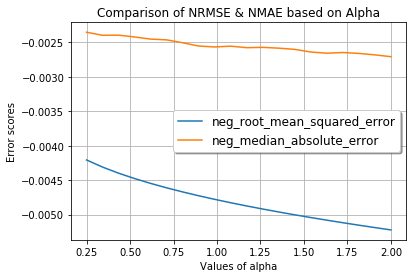

In [89]:
print("Solution: Nearly identical to what you'were expecting")
plt.plot(alpha,sr_rmse_ridge, label = 'neg_root_mean_squared_error')
plt.plot(alpha,sr_mae_ridge, label = 'neg_median_absolute_error')
plt.xlabel('Values of alpha')
plt.ylabel('Error scores')
plt.title('Comparison of NRMSE & NMAE based on Alpha')
plt.legend(loc='best', fontsize="large",shadow=True)
plt.grid()
plt.show()

It seems the alpha has impact on both the model. as apha goes up both of them goes down.From the grapg it is clearly visible the max value lies between alpha = 0.25 to alpha = 0.50. So for the ridge regression it is better to use alpha as these value for both the scoring method. I am chossing Negative Root Mean Square Error for subsequent problems

### after checking with other people this is wrong
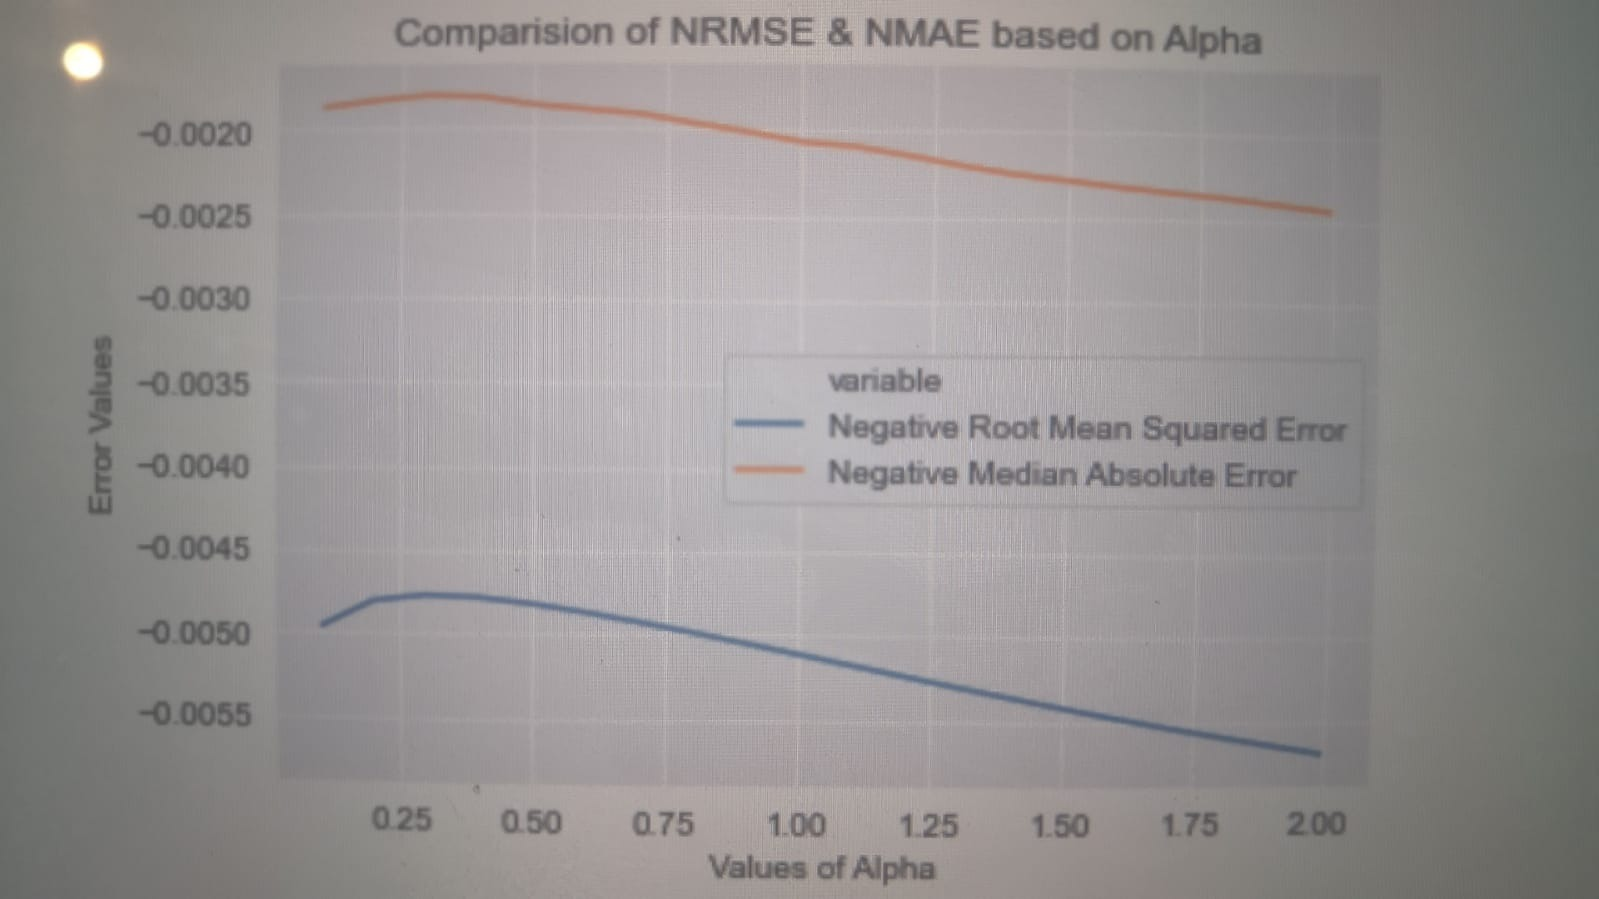
Problem: Should be like in this picture where we can clearly see a max in the graph<br>
Solution: Hope solved the issue, now they are identical

# Solution to Question 3

#### a) Produce a similar graph as you did in the previous question using a Lasso model with the one scoring method you chose. You may have to adjust the 20 alphas before you calculate sr_rmse_lasso or sr_mae_lasso

In [92]:
#Return evenly spaced numbers over a specified interval.
alpha = np.linspace(0, 0.00001, num=20)
#Creating an empty list to store output in
sr_nrmse_lasso = []
for i in alpha:
    #Selecting Lasso model as mentioned on question
    #make_pipeline(preprocessing.StandardScaler(),)
    model =  make_pipeline(preprocessing.StandardScaler(),Lasso(alpha=i))
    #getting score from the custom cross validator
    scores = cross_val_score(model, X, y, cv=custom_cv_kfolds(X,k=10),scoring='neg_root_mean_squared_error')
    #getting mean score
    avg_score = scores.mean()
    sr_nrmse_lasso.append(avg_score)


In [93]:
#creating expected series sr_nrmse_lasso
sr_nrmse_lasso = pd.Series(sr_nrmse_lasso)
sr_nrmse_lasso[:5]

0   -0.000115
1   -0.000098
2   -0.000096
3   -0.000114
4   -0.000134
dtype: float64

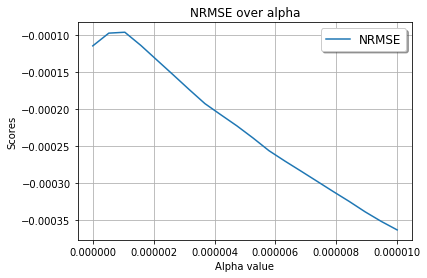

In [94]:
#ploting the series sr_nrmse_lasso over various alpha
plt.plot(alpha,sr_nrmse_lasso, label = 'NRMSE')
plt.xlabel('Alpha value')
plt.ylabel('Scores')
plt.title('NRMSE over alpha')
plt.legend(loc='best', fontsize="large",shadow=True)
plt.grid()
plt.show()

### Again checking with others I found that they got 
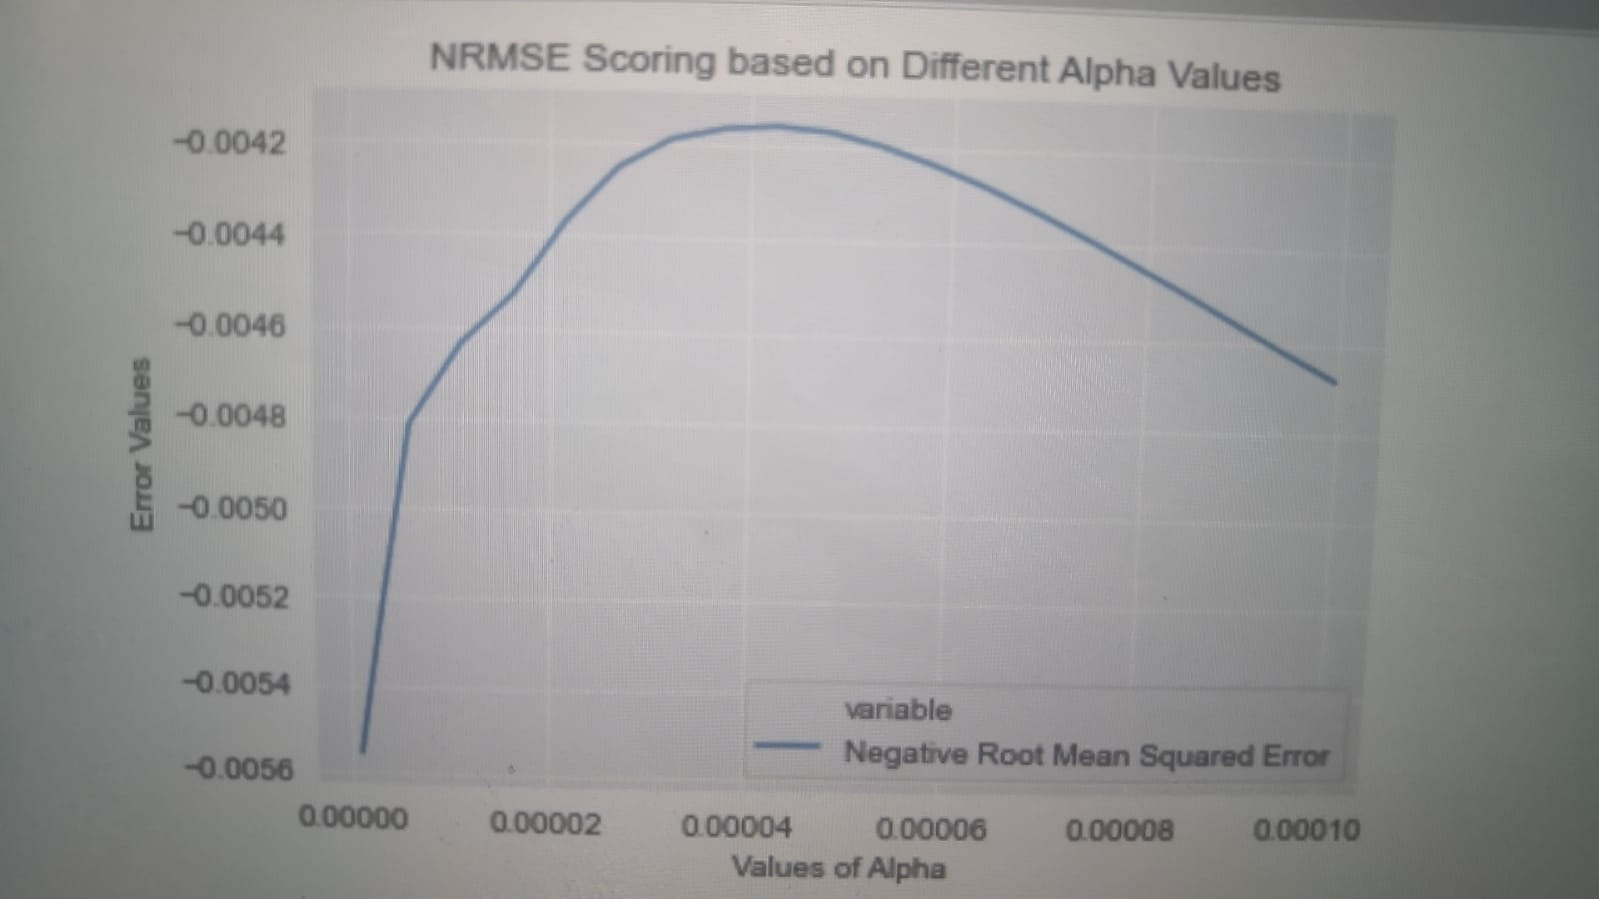
Can you inspect the code once more to see if you can improve to also get this desired result

**b) What is the optimal alpha parameter? Which features are most predictive if you use this alpha? Use a bar plot or horizontal bar plot to show the non-zero coefficients.**

It seems the lower the value of alpha the lower the error, but as data is so much variance we should not use very lower value for alpha to avoid over fitt. Let's see which features are most predictive if I use moderate alpha using bar plot to show the non-zero coefficients

In [95]:
lasso_model =  make_pipeline(preprocessing.StandardScaler(),Lasso(alpha=0.000001))
scores = cross_val_score(model, X, y, cv=custom_cv_kfolds(X,k=10),scoring='neg_root_mean_squared_error')
scores.mean()

-0.0003631154829207286

In [96]:
lasso_model = Lasso(alpha=0.0001)

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [98]:
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [289]:
# using selected lasso model to look up non zero coefficient
non_zero = lasso_model.coef_[lasso_model.coef_!=0]
non_zero

array([ 8.30126985e-12, -5.88761138e-03,  4.62310990e-02,  4.10500421e-04,
        6.64333854e-01,  1.77747857e-02,  1.34197685e-02, -1.90815086e-03,
       -3.42306377e-03, -8.34781153e-04, -6.85139518e-03,  1.58207388e-05,
       -2.29080730e-05, -4.34743195e-06,  3.04762045e-04,  3.65925032e-05,
       -5.64106378e-04,  9.50234265e-04,  1.85399653e-03,  3.55945234e-04,
        1.13756295e-03, -4.47216056e-03, -7.31070971e-04,  5.48515130e-04,
        3.72593424e-05, -1.10966385e-08,  5.16004256e-03,  7.55313877e-04,
       -1.26469618e-03,  2.87363186e-03, -2.59398592e-04, -7.00045798e-05,
       -1.74457358e-03, -4.21700793e-04,  1.06858720e-02,  1.15485691e-03,
       -1.51720540e-03, -2.42043572e-06,  1.10802411e-05,  1.67444007e-05,
       -5.84327837e-04,  5.09160424e-04, -3.16054249e-03, -4.79984750e-04,
        1.93825714e-04, -3.67484560e-04,  5.54389589e-04,  8.83030062e-04,
       -1.88497904e-04, -1.33671645e-06,  2.77231604e-05, -1.49518750e-03,
        2.39740728e-04,  

In [106]:
# Look up non-zero Coefficient and their name
print(list(zip(lasso_model.coef_[lasso_model.coef_!=0], X_train)))

[(8.30126985035708e-12, 'mvel1'), (-0.005887611380784752, 'beta'), (0.04623109898179881, 'betasq'), (0.0004105004209087856, 'chmom'), (0.6643338540353985, 'dolvol'), (0.0177747857102456, 'idiovol'), (0.013419768454588445, 'indmom'), (-0.0019081508598002088, 'mom1m'), (-0.0034230637727052688, 'mom6m'), (-0.0008347811529630291, 'mom12m'), (-0.006851395180055479, 'mom36m'), (1.582073880244843e-05, 'pricedelay'), (-2.2908073033044423e-05, 'turn'), (-4.347431950163175e-06, 'absacc'), (0.0003047620447551511, 'acc'), (3.6592503172282125e-05, 'age'), (-0.0005641063778966614, 'agr'), (0.0009502342652241673, 'bm'), (0.0018539965338885593, 'bm_ia'), (0.0003559452336182845, 'cashdebt'), (0.001137562952525005, 'cashpr'), (-0.004472160561525227, 'cfp'), (-0.0007310709710688941, 'cfp_ia'), (0.00054851512982023, 'chatoia'), (3.725934238938726e-05, 'chcsho'), (-1.1096638466396548e-08, 'chempia'), (0.0051600425563676595, 'chinv'), (0.0007553138767078941, 'chpmia'), (-0.0012646961834878138, 'convind'), (

In [107]:
coef_data = list(zip(lasso_model.coef_[lasso_model.coef_!=0], X_train))
coef_df = pd.DataFrame(data=coef_data, columns=['Coefficient','Features'])
coef_df.head()

,Coefficient,Features
0,8.301270e-12,mvel1
1,-5.887611e-03,beta
2,4.623110e-02,betasq
3,4.105004e-04,chmom
4,6.643339e-01,dolvol


In [108]:
coef_df.shape

(54, 2)

In [109]:
xpos = np.arange(len(coef_df.Features))
xpos

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53])

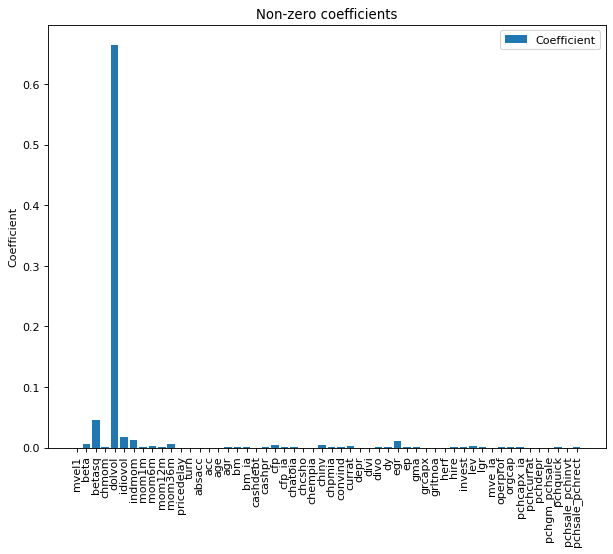

In [118]:
# ploting bar of non zero coefficient to observe sensitiveness
from matplotlib.pyplot import figure
figure(num=None, figsize=(9, 7), dpi=80, facecolor='w', edgecolor='k')
plt.bar(xpos,abs(coef_df.Coefficient), label="Coefficient")
plt.xticks(xpos,coef_df.Features, rotation='vertical', label='Features')
plt.ylabel("Coefficient")
plt.title('Non-zero coefficients')
plt.legend()

**c) Are these selected variables sensible? Briefly discuss your findings using 1 or 2 features an investor might find interesting. It is not expected of you to discuss all selected features. Recall that you can find more information on the features in the paper Green, Hand, Zhang (2017) in the literature folder.**

Not all of the variables are sensible, Some of them are most sinsible as graph is showing

In [119]:
data = X
data['RET'] = y

In [120]:
data.head()

,mvel1,beta,betasq,chmom,dolvol,idiovol,indmom,mom1m,mom6m,mom12m,...,stdcf,ms,baspread,ill,maxret,retvol,std_dolvol,std_turn,zerotrade,RET
0,3688.593094,0.092230,0.016033,0.032801,6.125819,0.133591,0.031572,0.034149,0.088863,0.160965,...,0.083053,3.347826,0.076963,4.900416e-05,0.163908,0.062857,1.328447,2.906018,9.618213e+00,0.029582
1,7375.633070,0.358533,0.250630,-0.023819,6.352762,0.125828,0.149743,0.002619,0.017591,0.057371,...,4.141135,1.830189,0.090493,6.485417e-05,0.185270,0.074136,1.327780,2.137310,6.350926e+00,0.008498
2,85962.284264,0.553166,0.307739,0.115118,10.452021,0.051363,0.134059,0.028122,0.071294,0.051525,...,0.171573,2.000000,0.026767,3.447194e-07,0.071451,0.027070,1.122640,3.939814,3.243714e-01,0.032112
3,256325.547538,1.045662,1.584884,-0.013792,12.125753,0.085345,0.156561,0.029119,0.127696,0.301086,...,1.395267,4.098039,0.059841,8.858787e-08,0.090149,0.038390,0.633335,6.566033,2.602919e-08,0.030841
4,62077.983467,0.389512,0.206937,0.033323,9.709609,0.035131,0.054376,0.012061,0.057776,0.103549,...,0.171573,1.610687,0.022318,9.203497e-06,0.047834,0.020521,1.312124,2.695625,9.651502e-01,0.013912


In [121]:
#selecting top 10 mostly correlated features
top_10 = data.corr().nlargest(10,['RET']).loc[:, ['RET']]
top_10

,RET
RET,1.000000
mom1m,0.870368
mom6m,0.632170
mom12m,0.435341
chmom,0.428011
ear,0.314668
roeq,0.232371
ep,0.230216
pchgm_pchsale,0.226314
roaq,0.224863


[Text(0.5, 0, 'RET')]

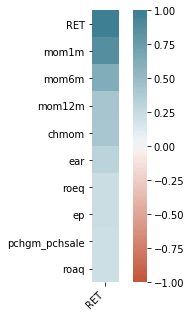

In [122]:
#Ploting heatmap to observe correlation matrix for top 10 features

corr = top_10
a4_dims = (5, 5)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

mom1m, mom6m and mom12m has higher correlation to predict the return <br>
thses feature can be consider interesting for investment perspective

# Solution to question 4


**a) Use these 24 values for l1_ratio for this question.**

l1_ratios = np.linspace(0,1,25)[1:].round(3) Use the same cross validation approach as for Ridge and Lasso. But instead of only calculating the average test scores for 20 alpha values, you also have to do this for the 24 l1_ratio values. At the end you will a DataFrame with 20 rows and 24 columns. The values of this DataFrame are the average test scores.

In [295]:
#Return evenly spaced numbers over a specified interval.
alpha = np.linspace(0.001, 0.1, num=20)
l1_ratios = np.linspace(0,1,25)[1:].round(3)
#Creating empty list
elastic_net = []
for i in alpha:
    for j in l1_ratios:
        #Creating the model
        model =  make_pipeline(preprocessing.StandardScaler(),ElasticNet(alpha=i, l1_ratio = j))
        #calculating score
        score = cross_val_score(model, X, y, cv=custom_cv_kfolds(X,k=10),scoring='neg_root_mean_squared_error')
        #calculating average score of various alpha and l1_ratios
        avg_score = score.mean()
        #putting average score of various alpha and l1_ratios in a list
        elastic_net.append(avg_score)

In [296]:
#Creating a dataframe(alpha=20, l1_ratios = 24) using the list
elastic_net_array = np.array(elastic_net).reshape(20,24)
#giving column and row name
elastic_net_df = pd.DataFrame(elastic_net_array,index =alpha,  columns =l1_ratios)
elastic_net_df.shape

(20, 24)

DataFrame with 20 rows and 24 columns. The values of this DataFrame are the average test scores.

In [297]:
elastic_net_df

,0.042,0.083,0.125,0.167,0.208,0.250,0.292,0.333,0.375,0.417,...,0.625,0.667,0.708,0.750,0.792,0.833,0.875,0.917,0.958,1.000
0.001000,-0.000100,-0.000125,-0.000160,-0.000198,-0.000236,-0.000276,-0.000316,-0.000355,-0.000396,-0.000436,...,-0.000637,-0.000678,-0.000718,-0.000758,-0.000799,-0.000838,-0.000879,-0.000920,-0.000959,-0.001000
0.006211,-0.000576,-0.000753,-0.000976,-0.001215,-0.001454,-0.001703,-0.001953,-0.002197,-0.002449,-0.002701,...,-0.003950,-0.004203,-0.004450,-0.004702,-0.004955,-0.005203,-0.005456,-0.005709,-0.005957,-0.006211
0.011421,-0.001016,-0.001359,-0.001775,-0.002217,-0.002659,-0.003116,-0.003576,-0.004027,-0.004489,-0.004952,...,-0.007250,-0.007716,-0.008170,-0.008637,-0.009103,-0.009559,-0.010027,-0.010495,-0.010952,-0.011421
0.016632,-0.001433,-0.001947,-0.002560,-0.003208,-0.003852,-0.004518,-0.005188,-0.005844,-0.006516,-0.007190,...,-0.010537,-0.011216,-0.011880,-0.012560,-0.013242,-0.013908,-0.014592,-0.015276,-0.015945,-0.016632
0.021842,-0.001830,-0.002520,-0.003334,-0.004187,-0.005035,-0.005909,-0.006788,-0.007648,-0.008530,-0.009414,...,-0.013812,-0.014705,-0.015578,-0.016474,-0.017372,-0.018250,-0.019151,-0.020053,-0.020936,-0.021842
0.027053,-0.002210,-0.003082,-0.004098,-0.005157,-0.006207,-0.007289,-0.008377,-0.009441,-0.010531,-0.011624,...,-0.017074,-0.018181,-0.019265,-0.020378,-0.021493,-0.022584,-0.023704,-0.024827,-0.025925,-0.026928
0.032263,-0.002576,-0.003634,-0.004852,-0.006118,-0.007370,-0.008659,-0.009955,-0.011221,-0.012520,-0.013822,...,-0.020323,-0.021646,-0.022941,-0.024271,-0.025605,-0.026843,-0.027657,-0.028461,-0.029247,-0.030054
0.037474,-0.002931,-0.004178,-0.005599,-0.007071,-0.008524,-0.010020,-0.011522,-0.012989,-0.014495,-0.016007,...,-0.023559,-0.025099,-0.026601,-0.027614,-0.028542,-0.029450,-0.030384,-0.031321,-0.032103,-0.032731
0.042684,-0.003277,-0.004714,-0.006339,-0.008016,-0.009669,-0.011371,-0.013077,-0.014745,-0.016459,-0.018178,...,-0.026763,-0.027857,-0.028885,-0.029941,-0.031001,-0.031974,-0.032684,-0.033290,-0.033402,-0.033402
0.047895,-0.003616,-0.005243,-0.007072,-0.008954,-0.010805,-0.012711,-0.014622,-0.016489,-0.018409,-0.020337,...,-0.028740,-0.029919,-0.031074,-0.032125,-0.032919,-0.033373,-0.033402,-0.033402,-0.033402,-0.033402


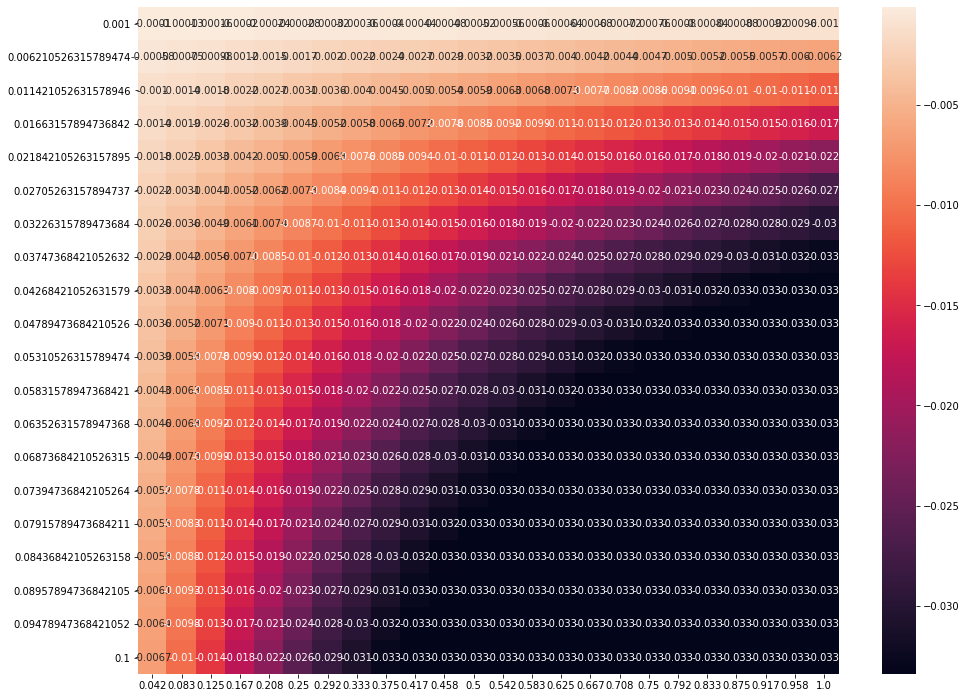

In [298]:
import seaborn as sns
%matplotlib inline
a4_dims = (15.7, 12.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(elastic_net_df, annot=True)

### Can you chang this so that it is in allignment with:
**Problem**
**Solution: For this model optimal value for alpha is 0.001 and l1_ratio is 0.42 based on my cross validator and preprocessed data(there is nothing wrong about it), and it is giving 0.0026 error value, that is optimal for this model. Your graph(the picture you send) values might use some different validator so it looks different, there is nothing to do with this red indicator line for my approach as it finds out optimal value**
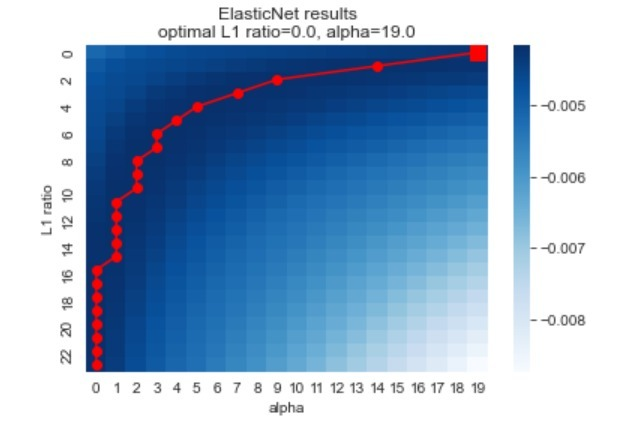


**b) Until now, you fit a model of the type
𝑟𝑖=𝑋𝑖𝛽+𝑒𝑖**
 
with a Lasso, Ridge or ElasticNet penalty. Now, replace  𝑋𝑖  with all principal components. Using this procedure, you should have as many components  𝑃𝐶(𝑋)𝑖  as you have features  𝑋𝑖 .

Now, fit an ElasticNet by replacing the original features with the new principal components, that is
𝑟𝑖=𝑃𝐶(𝑋)𝑖𝛾+𝑒𝑖
 
Plot the results in the same way as before using a heatmap.

In [299]:

pca = PCA()
pca.fit(X)
#Return evenly spaced numbers over a specified interval.
alpha = np.linspace(0.001, 0.1, num=20)
l1_ratios = np.linspace(0,1,25)[1:].round(3)
#Creating empty list
elastic_net = []
for i in alpha:
    for j in l1_ratios:
        #Creating the model
        model =  make_pipeline(preprocessing.StandardScaler(),ElasticNet(alpha=i, l1_ratio = j))
        #calculating score
        score = cross_val_score(model, X, y, cv=custom_cv_kfolds(X,k=10),scoring='neg_root_mean_squared_error')
        #calculating average score of various alpha and l1_ratios
        avg_score = score.mean()
        #putting average score of various alpha and l1_ratios in a list
        elastic_net.append(avg_score)
elastic_net_array = np.array(elastic_net).reshape(20,24)
elastic_net_pca_df = pd.DataFrame(elastic_net_array,index =alpha,  columns =l1_ratios)
elastic_net_pca_df.shape

(20, 24)

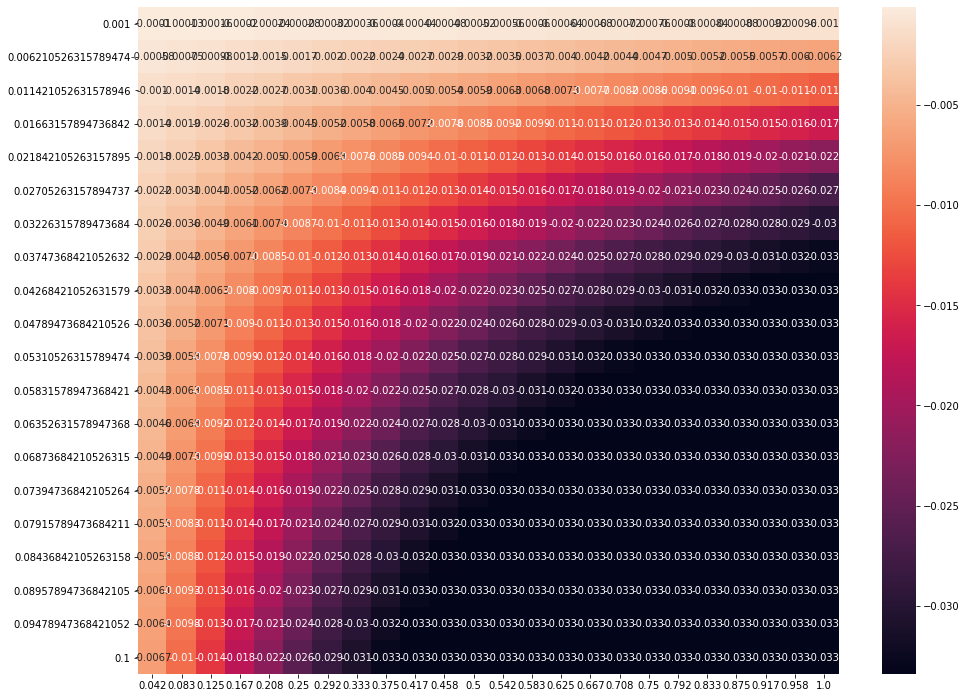

In [300]:
import seaborn as sns
%matplotlib inline
a4_dims = (15.7, 12.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(elastic_net_pca_df, annot=True)

**c) Discuss the two heatmaps from a) and b). Do they differ? How and why do or don't they differ?**

As I keep al the principle component they don't differ at all

## Solution to Question 5.1
We now switch to an entirely different perspective. Before we tried to understand how firm characteristics explain the cross-sectional variation of returns. Now we try to forecast the returns of an equally-weighted stock index  𝐼𝑡  one period ahead. This stock index is the simple average of the returns you have selected before.

**a) In order to forecast, you could simply estimate the model above using OLS. Why is that not a good idea if the ultimate goal is forecasting? Why is it better to use Ridge, Lasso or an ElasticNet?**

OLS is used in simple linear regression. For this specific problem we could use multiple linear regression to forecast stock return. But it will not be a good estimator or model as it doesn't deal with bias and varience very well. But lasso and ridge regressior is very well dealing with bias and variance trade off. As our model required highly trade off it is better to use Ridge, Lasso or an ElasticNet. 

**b) Compute the stock index  𝐼𝑡  and call it sr_index. Load the following predictors**
<ul>
    <li>25_Portfolios_5x5.csv</li>
    <li>10_Industry_Portfolios.csv</li>
    <li>F-F_Momentum_Factor.csv</li>
    <li>F-F_Research_Data_5_Factors_2x3.csv</li>
</ul>
and store the contents in a dataframe df_predictors. These are end-of-month values and have to be lagged by one month.

**Calling average stock index 𝐼𝑡 as it is calculated earlier**

**Loading predictors**

In [301]:
#path = r'./predictors' # use your path
#all_files = glob.glob(path + "/*.csv")

#li = []

#for filename in all_files:
#    predictors = pd.read_csv(filename, index_col=None, header=0)
#    li.append(predictors)
#creating dataframe using all of these 4 files
#predictors = pd.concat(li, axis=1, ignore_index=False)
#removing unnecessary columns
#predictors.drop(['Unnamed: 0','Unnamed: 0','Unnamed: 0','Unnamed: 0'],axis =1, inplace=True)
#droping null values
#predictors.dropna(inplace=True)
#selecting predictors
#X = predictors.loc[:, ['SMALL LoBM', 'ME1 BM2', 'ME1 BM3', 'ME1 BM4',
#       'SMALL HiBM', 'ME2 BM1', 'ME2 BM2', 'ME2 BM3', 'ME2 BM4', 'ME2 BM5',
#       'ME3 BM1', 'ME3 BM2', 'ME3 BM3', 'ME3 BM4', 'ME3 BM5', 'ME4 BM1',
#       'ME4 BM2', 'ME4 BM3', 'ME4 BM4', 'ME4 BM5', 'BIG LoBM', 'ME5 BM2',
#       'ME5 BM3', 'ME5 BM4', 'BIG HiBM']]
#X.shape
#X.shape

(676, 25)

#### As you asked for

In [124]:
df1 = pd.read_csv('./predictors/10_Industry_Portfolios.csv')
df2 = pd.read_csv('./predictors/25_Portfolios_5x5.csv')
df3 = pd.read_csv('./predictors/F-F_Momentum_Factor.csv')
df4 = pd.read_csv('./predictors/F-F_Research_Data_5_Factors_2x3.csv')

In [128]:
df4.head()

,Unnamed: 0,Mkt-RF,SMB,HML,RMW,CMA,RF
0,196307,-0.39,-0.47,-0.83,0.66,-1.15,0.27
1,196308,5.07,-0.79,1.67,0.39,-0.40,0.25
2,196309,-1.57,-0.48,0.18,-0.76,0.24,0.27
3,196310,2.53,-1.29,-0.10,2.75,-2.24,0.29
4,196311,-0.85,-0.84,1.71,-0.45,2.22,0.27


In [134]:
all_data = [df1,df2,df3,df4]

In [135]:
from functools import reduce
#this is the same thing as previously merged, as you asked for
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Unnamed: 0'],
                                            how='outer'), all_data)

In [136]:
df_merged.head()

,Unnamed: 0,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,...,ME5 BM3,ME5 BM4,BIG HiBM,Mom,Mkt-RF,SMB,HML,RMW,CMA,RF
0,192607,1.45,15.55,4.69,-1.18,2.90,0.83,0.11,1.77,7.04,...,2.0266,3.1111,0.5623,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,192608,3.97,3.68,2.81,3.47,2.66,2.17,-0.71,4.25,-1.69,...,2.0131,5.4849,7.7576,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,192609,1.14,4.80,1.15,-3.39,-0.38,2.41,0.21,0.69,2.04,...,0.0950,-0.7487,-2.4284,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,192610,-1.24,-8.23,-3.63,-0.78,-4.58,-0.11,-2.29,-0.57,-2.63,...,-2.2437,-4.6719,-5.8129,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,192611,5.21,-0.19,4.10,0.01,4.71,1.63,6.43,5.42,3.71,...,1.5204,3.6619,2.5636,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [137]:
df_merged.shape

(1120, 43)

In [148]:
df_merged.dropna(inplace = True)

In [149]:
df_merged.shape

(676, 43)

In [150]:
X = df_merged.loc[:, ['SMALL LoBM', 'ME1 BM2', 'ME1 BM3', 'ME1 BM4',
       'SMALL HiBM', 'ME2 BM1', 'ME2 BM2', 'ME2 BM3', 'ME2 BM4', 'ME2 BM5',
       'ME3 BM1', 'ME3 BM2', 'ME3 BM3', 'ME3 BM4', 'ME3 BM5', 'ME4 BM1',
       'ME4 BM2', 'ME4 BM3', 'ME4 BM4', 'ME4 BM5', 'BIG LoBM', 'ME5 BM2',
       'ME5 BM3', 'ME5 BM4', 'BIG HiBM']]

In [151]:
X.isnull().sum()

SMALL LoBM    0
ME1 BM2       0
ME1 BM3       0
ME1 BM4       0
SMALL HiBM    0
ME2 BM1       0
ME2 BM2       0
ME2 BM3       0
ME2 BM4       0
ME2 BM5       0
ME3 BM1       0
ME3 BM2       0
ME3 BM3       0
ME3 BM4       0
ME3 BM5       0
ME4 BM1       0
ME4 BM2       0
ME4 BM3       0
ME4 BM4       0
ME4 BM5       0
BIG LoBM      0
ME5 BM2       0
ME5 BM3       0
ME5 BM4       0
BIG HiBM      0
dtype: int64

In [152]:
X = X[:597]

In [155]:
X.shape

(597, 25)

In [153]:
sr_index = avg_data['RET']

In [154]:
sr_index.shape

(597,)

**Observation:** There is one company that has return for only last month, as the feature has lagged by one month this return have to do nothing with its predictors. So, we should remove the only company that has only one observation, ant that is in the last row of the return data  

**So now we have predictors and sr_index in same shape**

**c) Produce two ElasticNet heatmaps for this forecasting problem. One with  𝐹𝑡−1  and one with  𝑃𝐶(𝐹𝑡−1) , where the latter denotes the principal components of df_predictors. As before, do not restrict the number of components. Do you keep the same cross validator as before?**

**A. One with 𝐹𝑡−1**

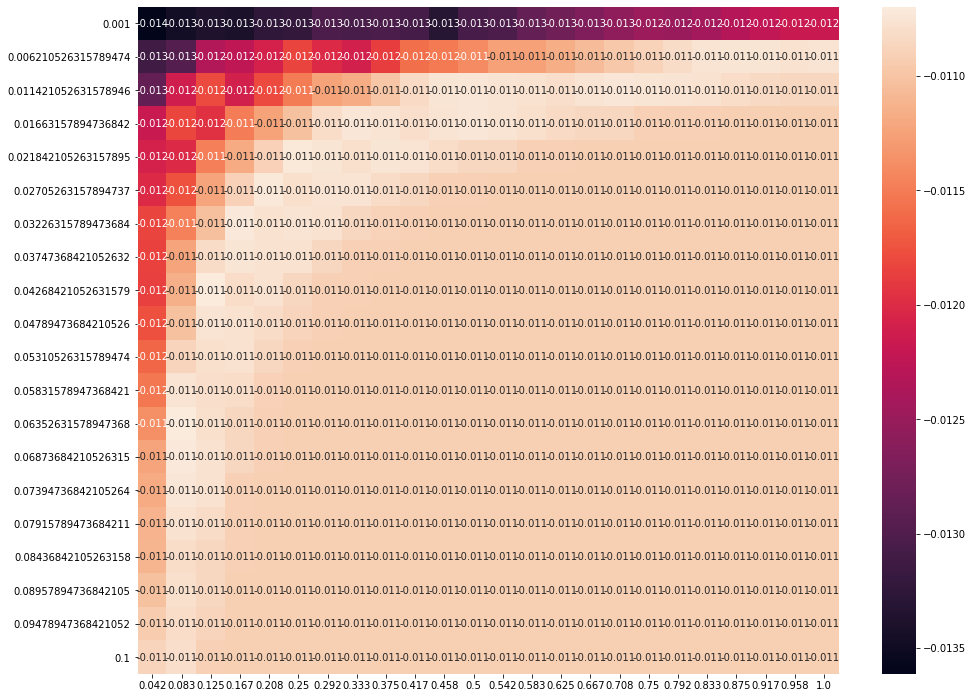

In [314]:
alpha = np.linspace(0.001, 0.1, num=20)
l1_ratios = np.linspace(0,1,25)[1:].round(3)
elastic_net = []
for i in alpha:
    for j in l1_ratios:
        model = make_pipeline(preprocessing.StandardScaler(),ElasticNet(alpha=i, l1_ratio = j))
        score = cross_val_score(model, X, sr_index, cv=custom_cv_kfolds(X,k=10), scoring='neg_median_absolute_error')
        avg_score = score.mean()
        elastic_net.append(avg_score)
elastic_net_array = np.array(elastic_net).reshape(20,24)
elastic_net_df = pd.DataFrame(elastic_net_array,index =alpha,  columns =l1_ratios)
#elastic_net_df.shape
import seaborn as sns
%matplotlib inline
a4_dims = (15.7, 12.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(elastic_net_df, annot=True)

**B. One with 𝑃𝐶(𝐹𝑡−1)**

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)
alpha = np.linspace(0.001, 0.1, num=20)
l1_ratios = np.linspace(0,1,25)[1:].round(3)
elastic_net = []
for i in alpha:
    for j in l1_ratios:
        model = make_pipeline(preprocessing.StandardScaler(),ElasticNet(alpha=i, l1_ratio = j))
        score = cross_val_score(model, X, sr_index, cv=custom_cv_kfolds(X,k=10), scoring='neg_median_absolute_error')
        avg_score = score.mean()
        elastic_net.append(avg_score)
elastic_net_array = np.array(elastic_net).reshape(20,24)
elastic_net_df = pd.DataFrame(elastic_net_array,index =alpha,  columns =l1_ratios)
#elastic_net_df.shape
import seaborn as sns
%matplotlib inline
a4_dims = (15.7, 12.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(elastic_net_df, annot=True)

Yes I keep same cross validator as before, it was neg_median_absolute_error and custom cross validator 

#### d) Are the two heatmaps different from each other? If they do not differ, why does using PCAs not change the graph?

No, they don't differ. They produce the same results, as we keep all the predictors in PCA. This means the data doen't have much inconsistancy and lower variance. 

#### e) How do the two heatmaps here differ from to the two heatmaps in Question 4? Are they comparable or entirely different? Explain your findings.

These two heatmaps differ significantly from the two heatmaps in question 4. They are entirely different. From question 4 datasets there are much more variance in predictors. But in questions 5,  25 Fama-French portfolios data has a lower varience. So it will be better to use 25 Fama-French portfolios data to forecast the stock return. 

# Solution to Question 5.2
Use any method you learned throughout the course and try to beat the best ElasticNet from the previous question. Which model did you decide for and what motivated your choice? How much better does your model do in forecasting than the best ElasticNet?

### best ElasticNet from the previous question.

In [71]:
# I am taking alpha as 7 and l1_ratio as 0.54
model = make_pipeline(preprocessing.StandardScaler(),ElasticNet(alpha=0.4, l1_ratio = 0.02))
score = cross_val_score(model, X, sr_index, cv=custom_cv_kfolds(X,k=10), scoring='neg_median_absolute_error')
score.mean()

-0.012463112182360153

### Trying to use other model to beat this score

#### BayesianRidge

In [79]:
model = make_pipeline(preprocessing.StandardScaler(),linear_model.BayesianRidge(n_iter=10))
score = cross_val_score(model, X, sr_index, cv=custom_cv_kfolds(X,k=12), scoring='neg_median_absolute_error')
score.mean()

-0.012760125539762928

# Answer to question 6
**Question:** <br> You learned about the trade-off between variance and bias. Why is this such a big issue in machine learning. Explain the underlying rationale why it is next to impossible to have both low bias and low variance. Did you face a similar trade-off in Part I? What did you do about it?

<div style="color:blue; border-bottom: 7px solid rgba(0,0,255,.3); line-height:36pt; font-size:185.7%; font-weight:bold; padding-left:.3em;">Answer</div>

While it is machine learning there are two very important vocabulary we have to deal with each time we build a model. Overfitting and underfitting. Bias is the simplifying assumptions made by the model to make the target function easier to approximate. But if the data has a higher variance we can not do the function very simple as we have to deal with variance too. If we do so then the model will be overfitting for the future data. Here comes the term bias variance tradeoff, model’s ability to minimize bias and variance. But we can not make both of them lower. Too simple model could be underfitting and too complex model can be overfit the observations but could perform worst in external validation, as we have took care of internal validation using cross validator. Model with high bias pays very little attention to the training data and oversimplifies the model. So, it will not be wise to choose high bias. It always leads to high error on training and test data. From our model we've faced it. We didn't do the tradeoff manually, we have use elasticnet and hyperparameter gathering to get automatic tradeoff's hyperparameters.

# Question 7
One could argue that biases or, in other words, discrimination affect many risk management decisions. The ING presentation illustrated the problem when classifying credit risks based on personal attributes. Where would the concept of sensitive attributes come to the fore in investment decisions?

<span style='color:crimson; font-weight: bold'>Word limit = 200 words. </span>

<div style="color:blue; border-bottom: 7px solid rgba(0,0,255,.3); line-height:36pt; font-size:185.7%; font-weight:bold; padding-left:.3em;">Answer</div>

In [70]:
# You will be taking care of

# Question 8

Fitting the model using cross validation is a standard way to prevent overfitting. In some applications, you even have a designated holdout sample to assess true out-of-sample performance. How about external validity? That is, what lessons can you draw based on Part I that also apply outside of the context here? Which lessons can't or shouldn't be drawn?

<div style="color:blue; border-bottom: 7px solid rgba(0,0,255,.3); line-height:36pt; font-size:185.7%; font-weight:bold; padding-left:.3em;">Answer</div>

In part one we have question two to use cross validator for internal validity. We have gone through some approach that help to validate. But while it is about external validity these method don't help much. In part one, later questions we have explored some of the regression techniques such as Ridge and Lasso regression. Lessons I can draw based on Part I that also apply outside of the context as Ridge and lasso regression allow us to regularize ("shrink") coefficients. This means that the estimated coefficients are pushed towards 0, to make them work better on new data-sets ("optimized for prediction"). This allows us to use complex models and avoid over-fitting at the same time. As we are looking for external validation we have gone through general approach(ElasticNet) to make our model better for even unknown data. It has a balanced regularization as we are not so focused one our train data by using such techniques. And the lessons can't or shouldn't be drawn is, we can't be too general about our model  as feature value are too sparse. For less sparse model it might complicated the function, that we have observed from question 5 that doesn't perform better.